- 구글 드라이브 연결

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- 데이터 경로 변수

In [1]:
#DATA_PATH = "/content/drive/MyDrive/data/"
import os

DATA_PATH=os.getcwd()+'/data/'

- 시드값

In [2]:
SEED = 42

- 데이터 불러오기

In [3]:
import pandas as pd
import numpy as np

train = pd.read_csv(f"{DATA_PATH}titanic_train.csv") # 학습데이터
test = pd.read_csv(f"{DATA_PATH}titanic_test.csv") # 테스트 데이터
train.shape , test.shape

((916, 12), (393, 11))

In [4]:
train.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
1,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.0500,NaN,S
2,1286,0,3,"Kink-Heilmann, Mr. Anton",male,29.0,3,1,315153,22.0250,NaN,S
3,1130,1,2,"Hiltunen, Miss. Marta",female,18.0,1,1,250650,13.0000,NaN,S
4,461,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S


- 결측치 확인하기

In [5]:
train.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
gender           0
age            180
sibsp            0
parch            0
ticket           0
fare             0
cabin          706
embarked         0
dtype: int64

In [6]:
test.isnull().sum()

passengerid      0
pclass           0
name             0
gender           0
age             83
sibsp            0
parch            0
ticket           0
fare             1
cabin          308
embarked         2
dtype: int64

- 학습 데이터에서 얻은 통계량을 이용하여 결측치를 채워야한다.

In [7]:
age_mean = train["age"].mean()
fare_median = train["fare"].median()
cabin_unk = "UNK"
embarked_mode = train["embarked"].mode()[0]
age_mean , fare_median ,cabin_unk , embarked_mode

(29.904891304347824, 14.5, 'UNK', 'S')

- 학습데이터 결측치 처리

In [8]:
train["age"] = train["age"].fillna(age_mean)
train["cabin"] = train["cabin"].fillna(cabin_unk)

- 테스트데이터 결측치 처리

In [9]:
test["age"] = test["age"].fillna(age_mean)
test["fare"] = test["fare"].fillna(fare_median)
test["cabin"] = test["cabin"].fillna(cabin_unk)
test["embarked"] = test["embarked"].fillna(embarked_mode)

In [10]:
train.isnull().sum().sum() , test.isnull().sum().sum()

(0, 0)

- 특성으로 사용할 변수 추가하기

In [11]:
cols = ["age","sibsp","parch","fare","pclass","gender","embarked"]
train_ft = train[cols].copy()
test_ft = test[cols].copy()
train_ft.shape, test_ft.shape

((916, 7), (393, 7))

- 범주형 변수 원핫인코딩하여 특성으로 추가하기

In [12]:
from sklearn.preprocessing import OneHotEncoder
cols = ['gender','embarked']
enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(train[cols])

OneHotEncoder(handle_unknown='ignore')

In [13]:
# 학습 데이터
tmp = pd.DataFrame(
    enc.transform(train_ft[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
train_ft = pd.concat([train_ft,tmp],axis=1)
train_ft.head()

,age,sibsp,parch,fare,pclass,gender,embarked,gender_female,gender_male,embarked_C,embarked_Q,embarked_S
0,71.0,0,0,49.5042,1,male,C,0.0,1.0,1.0,0.0,0.0
1,34.0,0,0,8.0500,3,male,S,0.0,1.0,0.0,0.0,1.0
2,29.0,3,1,22.0250,3,male,S,0.0,1.0,0.0,0.0,1.0
3,18.0,1,1,13.0000,2,female,S,1.0,0.0,0.0,0.0,1.0
4,48.0,0,0,26.5500,1,male,S,0.0,1.0,0.0,0.0,1.0


In [14]:
# 테스트 데이터
tmp = pd.DataFrame(
    enc.transform(test_ft[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
test_ft = pd.concat([test_ft,tmp],axis=1)
test_ft.head()

,age,sibsp,parch,fare,pclass,gender,embarked,gender_female,gender_male,embarked_C,embarked_Q,embarked_S
0,62.000000,0,0,26.5500,1,male,S,0.0,1.0,0.0,0.0,1.0
1,28.000000,0,0,47.1000,1,male,S,0.0,1.0,0.0,0.0,1.0
2,24.000000,0,0,9.5000,3,male,S,0.0,1.0,0.0,0.0,1.0
3,29.904891,0,0,7.7333,3,female,Q,1.0,0.0,0.0,1.0,0.0
4,18.500000,0,0,7.2833,3,female,Q,1.0,0.0,0.0,1.0,0.0


- 문자열 데이터 제거

In [15]:
train_ft = train_ft.drop(columns=cols)
test_ft = test_ft.drop(columns=cols)

- Min-Max Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_ft)

MinMaxScaler()

In [17]:
train_ft[train_ft.columns] = scaler.transform(train_ft) # 학습 데이터
train_ft.head()

,age,sibsp,parch,fare,pclass,gender_female,gender_male,embarked_C,embarked_Q,embarked_S
0,0.887260,0.000,0.000000,0.096626,0.0,0.0,1.0,1.0,0.0,0.0
1,0.423776,0.000,0.000000,0.015713,1.0,0.0,1.0,0.0,0.0,1.0
2,0.361142,0.375,0.111111,0.042990,1.0,0.0,1.0,0.0,0.0,1.0
3,0.223350,0.125,0.111111,0.025374,0.5,1.0,0.0,0.0,0.0,1.0
4,0.599148,0.000,0.000000,0.051822,0.0,0.0,1.0,0.0,0.0,1.0


In [18]:
test_ft[test_ft.columns] = scaler.transform(test_ft) # 테스트 데이터
test_ft.head()

,age,sibsp,parch,fare,pclass,gender_female,gender_male,embarked_C,embarked_Q,embarked_S
0,0.774521,0.0,0.0,0.051822,0.0,0.0,1.0,0.0,0.0,1.0
1,0.348616,0.0,0.0,0.091933,0.0,0.0,1.0,0.0,0.0,1.0
2,0.298509,0.0,0.0,0.018543,1.0,0.0,1.0,0.0,0.0,1.0
3,0.372478,0.0,0.0,0.015094,1.0,1.0,0.0,0.0,1.0,0.0
4,0.229613,0.0,0.0,0.014216,1.0,1.0,0.0,0.0,1.0,0.0


- 정답 데이터

In [19]:
target = train["survived"]
target

0      0
1      0
2      0
3      1
4      1
      ..
911    1
912    0
913    0
914    0
915    0
Name: survived, Length: 916, dtype: int64

- 0~9 까지 손글씨 데이터셋(다중분류)

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()

In [21]:
x = digits.data
y = digits.target
x.shape, y.shape

((1797, 64), (1797,))

- 데이터 shuffle

In [22]:
np.random.seed(SEED) # 동일한 결과를 위해 시드고정
idx = np.arange(x.shape[0]) # 샘플들의 인덱스
np.random.shuffle(idx) # 샘플들의 인덱스 shuffle
x = x[idx] # shuffle 된 인덱스 반영
y = y[idx] # 정답값도 동일하게 반영

# 군집분석(Clustering analysis)
- 각 데이터의 유사성을 측정하여 다수의 군집으로 나누고 군집 간의 서로 다른 특성을 확인하는 분석​
- 유사도가 높은 데이터끼리 그룹화
- 예측을 위한 모델링 보다는 EDA를 위해 많이 사용(정답 보장 X)


## K-means(K-평균 군집화)
- 거리 기반 군집화로 가장 일반적으로 사용되는 알고리즘
- K개의 랜덤한 중심점으로 시작하여 K개의 중심점을 이동하며 가까운 데이터들을 묶는 군집화 기법​
1. 랜덤하게 K개의 중심점을 지정
2. 각 중심점별로 가까운 데이터들을 그룹화
3. 각 그룹의 평균 지점으로 중심점 이동
4. 중심점 이동 시 그룹에 속한 데이터의 변경이 없을 때까지 2~3단계 반복




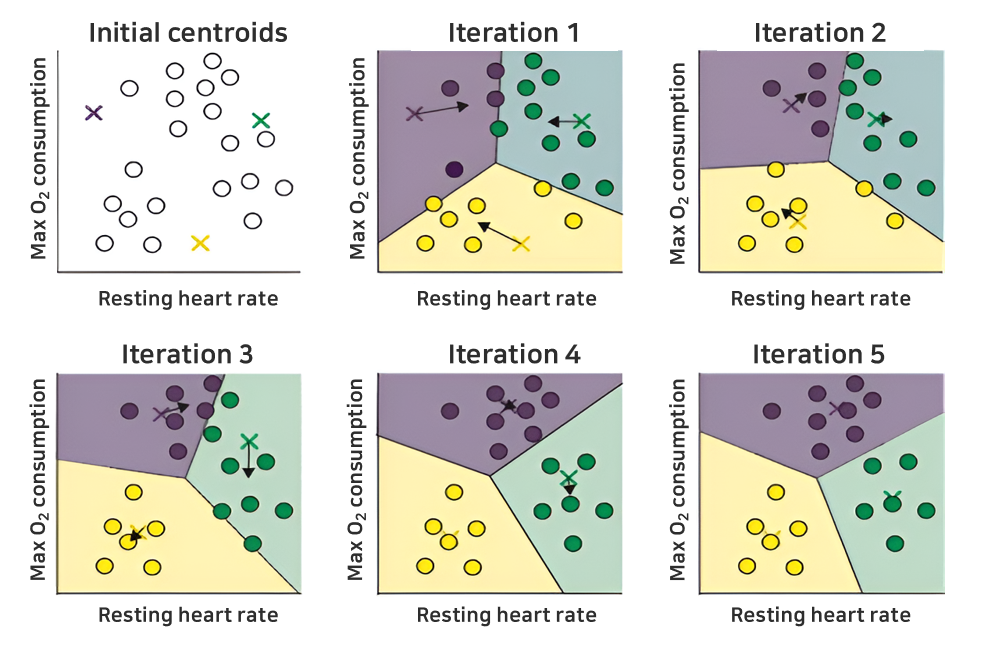

- 초기 중심에 민감하다.
- K-means++
    - 초기 중심점 선정의 어려움을 해결하기 위한 방법
        - 랜덤하게 1개의 데이터샘플을 중심점으로 선택
        - 해당 샘플과 가장 먼 샘플을 2번째 중심점으로 선택
        - 이 과정을 k 개가 될때까지 반복 후 군집화 진행한다.

- KMeans 클래스 주요 파라미터
    - random_state
        - 시드값
    - n_clusters
        - 군집수(K를 의미)
    - init
        - 초기 중심점 선정방법
        - 'k-means++'(기본값) , 'random'
    - n_init
        - 초기 중심위치 시도 횟수

In [23]:
from sklearn.cluster import KMeans
cluster = KMeans(10, random_state=SEED, n_init=10)
cluster.fit(x)

KMeans(n_clusters=10, n_init=10, random_state=42)

- 각 샘플의 군집번호 확인하기

In [24]:
cluster.labels_

array([3, 6, 0, ..., 8, 8, 4])

- 예측해서 군집번호 확인하기

In [25]:
cluster.predict(x)

array([3, 6, 0, ..., 8, 8, 4])

## 대표적인 군집화 성능 평가지표
- 군집화가 얼마나 잘되었는지 정량적으로 확인

### 사전에 정의된 그룹이 있는 경우
- 군집화 결과가 얼마나 사전에 정의된 그룹을 설명하는가를 평가


- homogeneity_score 함수
    - 각 군집(예측값)이 동일한 클래스(실제값)로 구성되어 있는 정도(동질성)
    - 0 ~ 1 값이며, 1에 가까울수록 군집화가 잘되었다는 의미

In [26]:
from sklearn.metrics import homogeneity_score
homogeneity_score(y, cluster.labels_)

0.7396909456190534

- completeness_score 함수
    - 각 클래스(실제값)에 대하여 동일한 군집(예측값)으로 구성되어 있는 정도(완전성)
    - 0 ~ 1 값이며, 1에 가까울수록 군집화가 잘되었다는 의미

In [27]:
from sklearn.metrics import completeness_score
completeness_score(y, cluster.labels_)

0.7483916017730616

- v_measure_score 함수
    - homogeneity 와 completeness의 조화평균
    - 0 ~ 1 값이며, 1에 가까울수록 군집화가 잘되었다는 의미

In [28]:
from sklearn.metrics import v_measure_score
v_measure_score(y, cluster.labels_)

0.7440158378028527

### 사전에 정의된 그룹이 없는 경우
- 대표적으로 실루엣 계수(silhouette coefficient)가 있다.
    - 군집 내의 거리는 짧을수록 군집 간의 거리가 길수록 좋은 군집화라는 가정을 평가하기 위한 지표
    - -1 ~ 1 의 값을 가진다.
    - 1에 가까울수록 최상의 군집화 되었다는 것을 의미
    - 0 에 가까울수록 군집간의 거리가 가까워지고 겹친다는 것을 의미
    - 음수일경우 잘못된 방식으로 군집화 되었다는 의미

In [29]:
from sklearn.metrics import silhouette_score
silhouette_score(x, cluster.labels_)

0.18247516649447781

## DBSCAN(Density-based spatial clustering of applications with noise)

- 밀도 기반 군집화의 대표적인 알고리즘으로 데이터 밀도 차이를 기반으로 하고 있어 복잡한 기하학적 분포도를 가진 데이터에 대해서도 군집화를 잘 수행하는 기법
1. 랜덤하게 데이터포인트들을 확인하고 지정한 반경 내에 지정한 최소개수만큼의 데이터가 포함되어 있으면
군집화가 되면서 해당 데이터포인트는 핵심포인트가 됨
2. 핵심포인트가 서로 연결(서로 반경 내에 포함)된다면
같은 군집으로 묶임
3. 연결되지 못하거나 최소 군집크기를 충족 못하면 노이즈로 분류됨
4. 모든 데이터포인트가 군집화, 노이즈가 될 때 까지 반복함



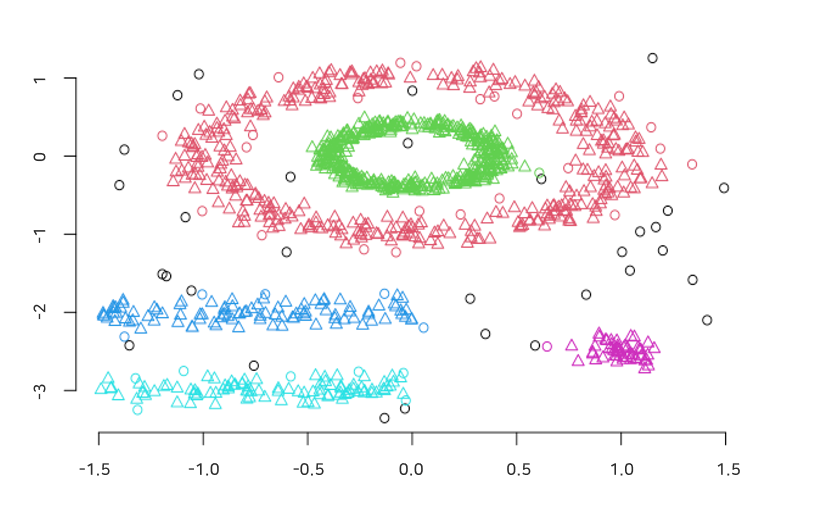

- DBSCAN 클래스 주요 파라미터
    - eps
        - 이웃으로 판단하는 최대 거리(반경)
    - min_samples
        - 이웃 반경 내 최소 샘플 수

In [30]:
from sklearn.cluster import DBSCAN
cluster = DBSCAN(eps=20, min_samples=5, n_jobs=-1)
cluster.fit(x)

DBSCAN(eps=20, n_jobs=-1)

In [31]:
np.unique(cluster.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [32]:
silhouette_score(x, cluster.labels_)

0.06961871458271532

## Agglomerative Clustering
- 가까운 군집들을 연결해 나가면서 계층적으로 군집화 하는 기법



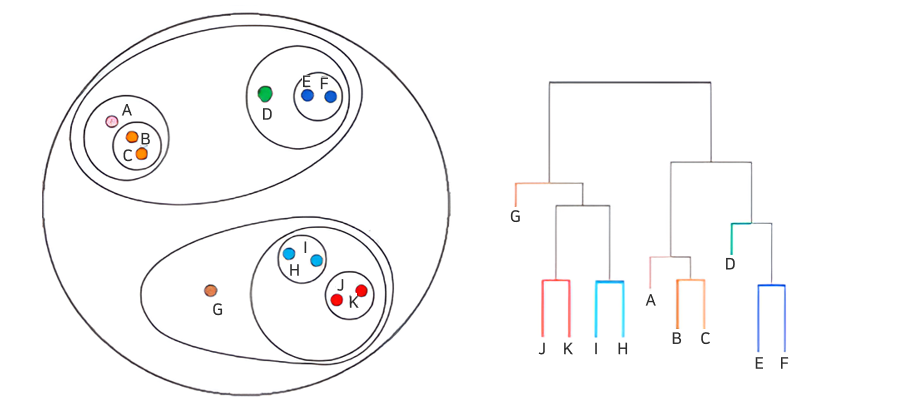

- AgglomerativeClustering 클래스 주요 파라미터
    - n_clusters
        - 군집수
    - linkage
        - 연결 기준
        - 'ward': 병합되는 군집의 분산이 최소화하도록 연결
        - 'average': 군집간의 모든 관측치 사이의 평균 거리를 사용
        - 'complete': 군집간의 모든 관측치 사이의 최대 거리를 사용
        - 'single': 군집간의 모든 관측치 사이의 최소 거리를 사용

In [33]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(10)
cluster.fit(x)

AgglomerativeClustering(n_clusters=10)

In [34]:
silhouette_score(x, cluster.labels_)

0.17849659940596493